In [1]:
import pandas as pd
import os
import re
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# function that cleans and loads feature names from spambase.names file
# data preprocessing
def load_feature_names(names_file_path):
    feature_names = []
    with open(names_file_path, 'r') as f:
        for line in f:
            if not line.startswith('|') and ':' in line:  
                feature_name = line.split(':')[0].strip()
                feature_names.append(feature_name)
    return feature_names

# loading data from spambase.data using extracted feature names
def load_spambase_data(data_file_path, feature_names):
    df = pd.read_csv(data_file_path, header=None, names=feature_names + ['label'])
    return df

# specifying paths
spambase_data_path = 'spambase.data'
spambase_names_path = 'spambase.names'

# calling the functions
feature_names = load_feature_names(spambase_names_path)
spambase_df = load_spambase_data(spambase_data_path, feature_names)

# small preview of the dataset
spambase_df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
# defining the path of easy_ham folder dataset
easy_ham_folder = 'easy_ham'

# function to extract email content while skipping headers
def extract_email_content(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()
        # extracting the main content by finding the end of headers
        body_index = content.find("\n\n")
        body_text = content[body_index+2:] if body_index != -1 else content
        # basic cleaning of unecessary words by removing non-alphanumeric characters except spaces
        body_text = re.sub(r'[^a-zA-Z\s]', '', body_text).lower()
    return body_text

# loading all emails from the easy_ham folder
ham_texts = []
for filename in os.listdir(easy_ham_folder):
    file_path = os.path.join(easy_ham_folder, filename)
    if os.path.isfile(file_path):
        ham_texts.append(extract_email_content(file_path))

# printing the number of ham emails loaded and display a sample
print(f"Loaded {len(ham_texts)} ham emails.")
print("Sample Ham Email Content:", ham_texts[0][:500])  # Display a sample content


Loaded 2551 ham emails.
Sample Ham Email Content:     date        wed  aug   
    from        chris garrigues cwgdatedfaddeepeddycom
    messageid  tmdadeepeddyvirciocom


   i cant reproduce this error

for me it is very repeatable like every time without fail

this is the debug log of the pick happening 

 pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace  sequence mercury
 exec pick inbox list lbrace lbrace subject ftp rbrace rbrace  sequence mercury
 ftocpickmsgs  hit
 marking  hits
 tkerror syntax error in expression int 


In [3]:
# vectorizing ham texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
ham_features = vectorizer.fit_transform(ham_texts).toarray()

# converting to DataFrame for easier handling
ham_df = pd.DataFrame(ham_features, columns=vectorizer.get_feature_names_out())
ham_df['label'] = 0  # ham emails (non-spam) will be labeled as 0s.

# preview the ham dataset
ham_df.head()


,aa,aalib,abandoned,ability,able,ablock,about,above,absence,absolute,...,young,your,youre,yours,yourself,youve,yup,zero,ziggy,zone
0,0.0,0.0,0.0,0.0,0.03881,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.062660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.028431,0.0,0.0,0.0,...,0.0,0.028966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.044498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.083834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# aligning columns between spambase and ham data by adding missing columns filled with zeros
for column in spambase_df.columns:
    if column not in ham_df.columns:
        ham_df[column] = 0

# combining the data from spambase (spam) and ham (non-spam)
combined_df = pd.concat([spambase_df, ham_df], ignore_index=True)

# seperating features and labels
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 0, Loss: 0.5399, Accuracy: 0.3015
Hidden Layer Activation Range: 2.2515440439951953e-06 0.9999950401955585
Output Layer Activation Range: 0.32302341767486825 0.8230118522560472
Epoch 100, Loss: 0.1122, Accuracy: 0.9491
Hidden Layer Activation Range: 3.9418799506910565e-13 0.9999999983956835
Output Layer Activation Range: 4.024456006460911e-05 0.999760115307302
Epoch 200, Loss: 0.0868, Accuracy: 0.9574
Hidden Layer Activation Range: 4.648158994772395e-18 0.9999999999998859
Output Layer Activation Range: 2.5290169271878973e-06 0.9999830925742924
Epoch 300, Loss: 0.0768, Accuracy: 0.9612
Hidden Layer Activation Range: 3.0225186489170702e-21 0.9999999999999998
Output Layer Activation Range: 4.854787966744586e-07 0.9999957007462466
Epoch 400, Loss: 0.0717, Accuracy: 0.9619
Hidden Layer Activation Range: 1.928749847963918e-22 1.0
Output Layer Activation Range: 1.583280839046128e-07 0.9999981988325765
Epoch 500, Loss: 0.0683, Accuracy: 0.9631
Hidden Layer Activation Range: 1.92874984796

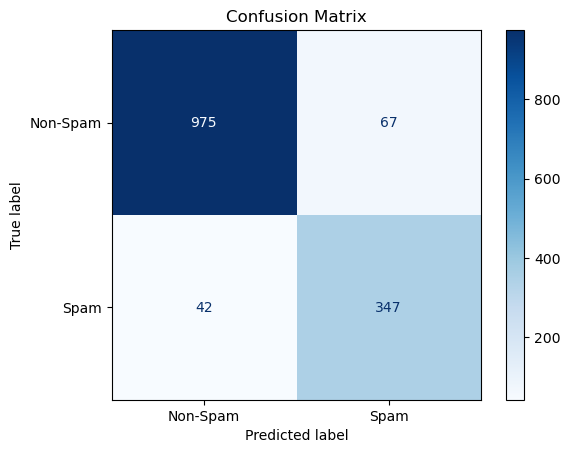

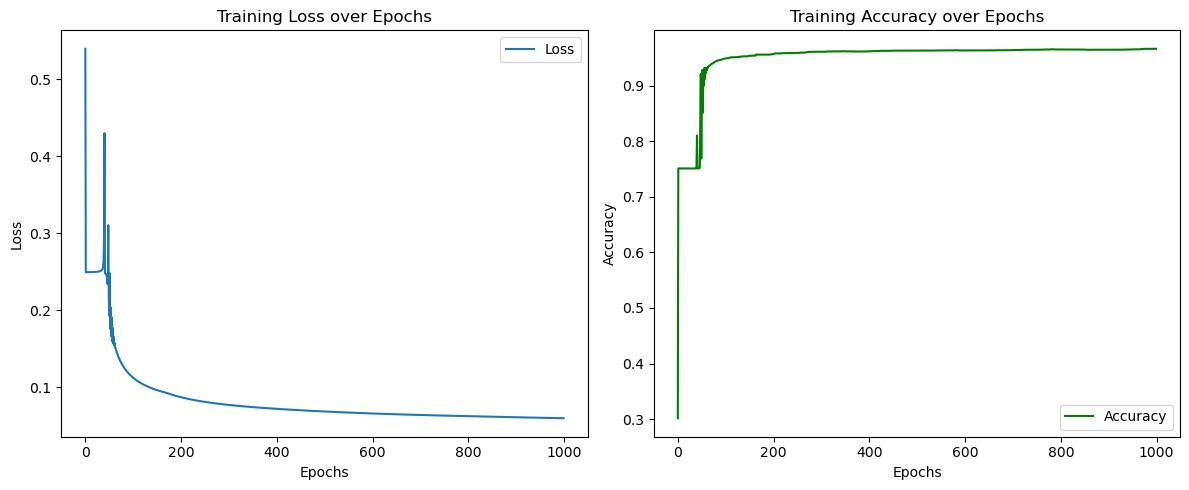

In [5]:
# handling error of NaN values by imputing with column means
imputer = SimpleImputer(strategy='mean') # this replaces Nan with mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# converting labels to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# defining neural network structure
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1

# initializing weights with Xavier Initialization
np.random.seed(42)
weights_input_hidden = np.random.randn(input_dim, hidden_dim) * np.sqrt(1 / input_dim)
weights_hidden_output = np.random.randn(hidden_dim, output_dim) * np.sqrt(1 / hidden_dim)

# defining sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# training parameters
learning_rate = 0.001
epochs = 1000
losses = []
accuracies = []

for epoch in range(epochs):
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    # clamp to avoid exploding activations
    hidden_layer_input = np.clip(hidden_layer_input, -50, 50)  
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_input = np.clip(output_layer_input, -50, 50) 
    output_layer_output = sigmoid(output_layer_input)

    # calculating error
    error = y_train.reshape(-1, 1) - output_layer_output
    loss = np.mean(np.abs(error))
    losses.append(loss)

    # calculating training accuracy
    train_predictions = (output_layer_output > 0.5).astype(int).flatten()
    accuracy = np.mean(train_predictions == y_train)
    accuracies.append(accuracy)

    # this helped in the debugging process of my code
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        print("Hidden Layer Activation Range:", np.min(hidden_layer_output), np.max(hidden_layer_output))
        print("Output Layer Activation Range:", np.min(output_layer_output), np.max(output_layer_output))

    # backpropagation
    output_error = error * sigmoid_derivative(output_layer_output)
    hidden_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # gradient clipping
    np.clip(output_error, -1, 1, out=output_error)
    np.clip(hidden_error, -1, 1, out=hidden_error)

    # updating weights
    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    weights_input_hidden += X_train.T.dot(hidden_error) * learning_rate

# evaluation on test data
hidden_layer_input_test = np.dot(X_test, weights_input_hidden)
hidden_layer_input_test = np.clip(hidden_layer_input_test, -50, 50)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
output_layer_input_test = np.clip(output_layer_input_test, -50, 50)
output_layer_output_test = sigmoid(output_layer_input_test)

# converting probabilities to binary labels (two choices)
y_pred_test = (output_layer_output_test > 0.5).astype(int).flatten()

# computing the test metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("\nModel Performance Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# creatring the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Non-Spam", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# plotting Loss and Accuracy over Epochs
plt.figure(figsize=(12, 5))

# loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracies, label='Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# forward pass on test data
hidden_layer_input_test = np.dot(X_test, weights_input_hidden)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
output_layer_output_test = sigmoid(output_layer_input_test)

# converting probabilities to binary labels with a threshold of 0.5
y_pred = (output_layer_output_test > 0.5).astype(int)

# calculating mean accuracy of the epochs
accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9238
